# Retro - Supplementary Figure 2

In [1]:
import os
import fsspec
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

## Load the data

In [2]:
with fsspec.open(
    "https://carbonplan.blob.core.windows.net/carbonplan-scratch/results/common-practice-verification.json",
    "r",
) as f:
    data = json.load(f)

In [3]:
df_aa = pd.DataFrame()
df_aa['common_practice'] = [d['common_practice'] for d in data['assessment_areas']]
df_aa['rfia'] = [d['rfia'] for d in data['assessment_areas']]

df_projects = pd.DataFrame()
df_projects['project_reported'] = [d['project_reported'] for d in data['projects']]
df_projects['recalculated'] = [d['recalculated'] for d in data['projects']]

## Make the plot

In [4]:
diffs = (df_projects['recalculated'] - df_projects['project_reported']) / df_projects['project_reported']

In [5]:
diffs[np.isfinite(diffs)].mean()

0.03226222826616072

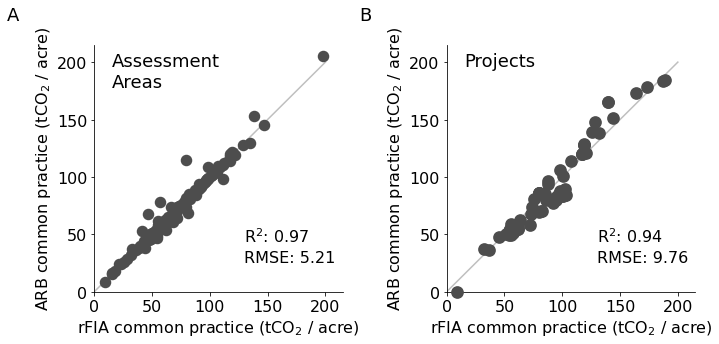

In [6]:
plt.rcParams.update({"font.size": 14, "svg.fonttype": "none"})

fig, axs = plt.subplots(1, 2, figsize=[10, 5])


axs[0].scatter(
    df_aa["rfia"],
    df_aa["common_practice"],
    marker=".",
    s=400,
    color=".3",
    lw=1.5,
    label="Common practice",
    zorder=10,
    clip_on=False
)

axs[0].annotate(f'R$^2$: {np.corrcoef([df_aa["rfia"], df_aa["common_practice"]])[0,1] ** 2:.2f}',xy=(150, 50), xycoords='axes points', fontsize=16)
axs[0].annotate(f'RMSE: {np.sqrt(np.mean((df_aa["rfia"] - df_aa["common_practice"]) ** 2)):.2f}',xy=(150, 30), xycoords='axes points', fontsize=16)

axs[1].scatter(
    df_projects["recalculated"],
    df_projects["project_reported"],
    marker=".",
    s=500,
    color=".3",
    lw=1.5,
    label="Common practice",
    zorder=10,
    clip_on=False,
)

axs[1].annotate(f'R$^2$: {np.corrcoef([df_projects["project_reported"], df_projects["recalculated"]])[0,1] ** 2:.2f}',xy=(150, 50), xycoords='axes points', fontsize=16)
axs[1].annotate(f'RMSE: {np.sqrt(np.mean((df_projects["project_reported"] - df_projects["recalculated"]) ** 2)):.2f}',xy=(150, 30), xycoords='axes points', fontsize=16)

for ax, label, kind in zip(axs, ['A', 'B'], ['Assessment\nAreas', 'Projects']):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.plot([0, 200], [0, 200], '-', color=(0.75, 0.75, 0.75))
    ax.set_ylim([0, 215])
    ax.set_xlim([0, 215])
    ax.set_xticks([0, 50, 100, 150, 200])
    ax.set_yticks([0, 50, 100, 150, 200])
    ax.tick_params(labelsize=16)
    ax.set_ylabel("ARB common practice (tCO$_2$ / acre)", fontsize=16)
    ax.set_xlabel("rFIA common practice (tCO$_2$ / acre)", fontsize=16)
    ax.annotate(label, xy=(-.35, 1.1), xycoords='axes fraction', fontsize=18)
    ax.annotate(kind, xy=(0.07, 0.97), xycoords='axes fraction', fontsize=18, va='top')

fname = "Supplementary-Figure-2.svg"
if "BLOB_ACCOUNT_KEY" in os.environ:
    with fsspec.open(
        f"az://carbonplan-retro/figures/raw/{fname}",
        "w",
        account_name="carbonplan",
        account_key=os.environ["BLOB_ACCOUNT_KEY"],
    ) as f:
        fig.savefig(f, format="svg")
else:
    plt.savefig(fname)
    
fig.tight_layout() 